
Available columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


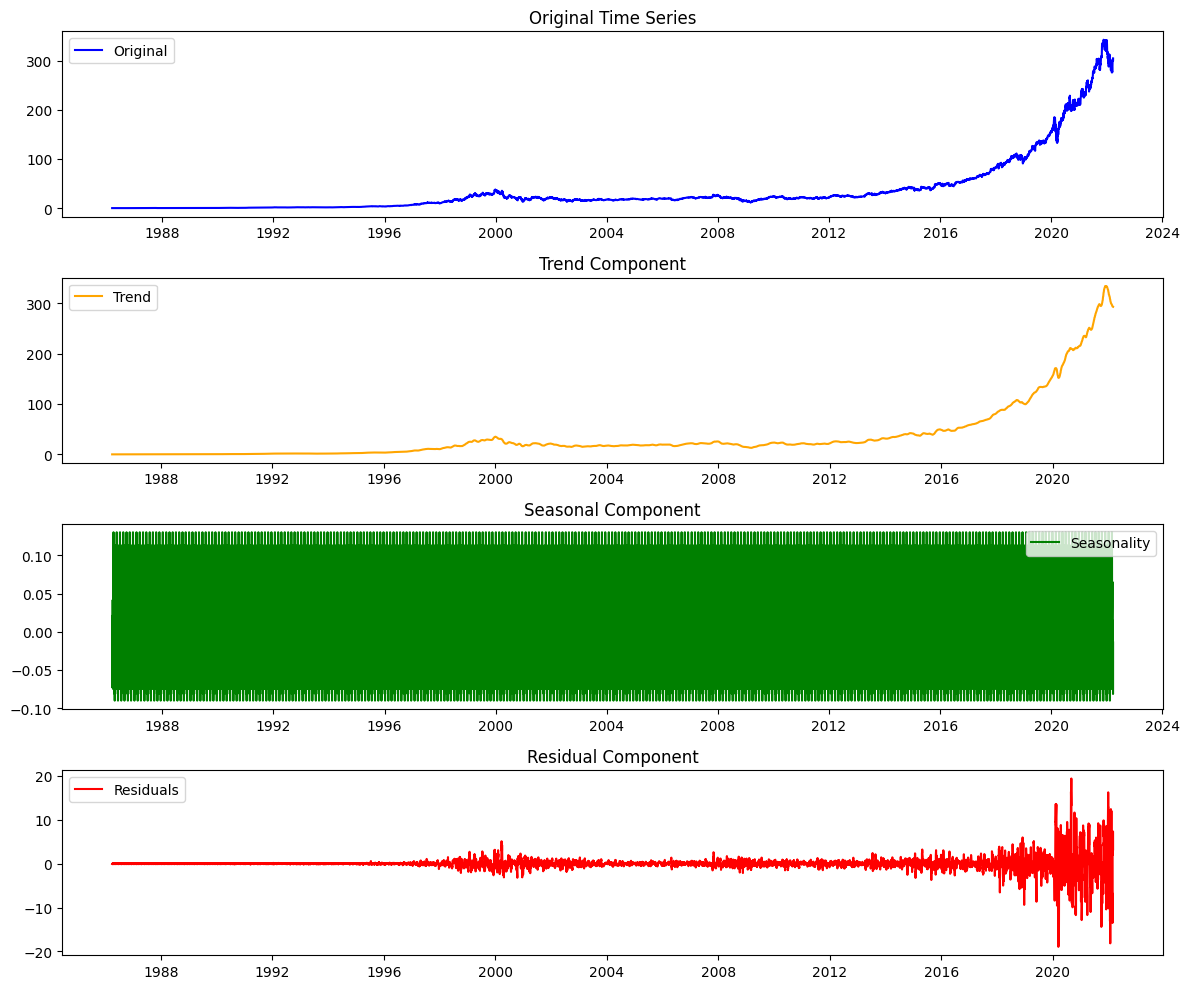

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = r"/content/MSFT.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
df.columns = df.columns.str.strip()
print("\nAvailable columns:", df.columns)

# Specify the target column for decomposition
target_col = "Adj Close"
if target_col not in df.columns:
    raise ValueError(f"'{target_col}' column not found in the dataset.")

# Extract the target time series and remove any missing values
ts = df[target_col].dropna()

# Perform seasonal decomposition
result = seasonal_decompose(ts, model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(ts, label="Original", color='blue')
plt.title("Original Time Series")
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label="Trend", color='orange')
plt.title("Trend Component")
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label="Seasonality", color='green')
plt.title("Seasonal Component")
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label="Residuals", color='red')
plt.title("Residual Component")
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()